# Forza 7 Telemetry Receiver
## By [William Kane](github.com/tubestubes)  

## Preparation:
- Send the data in game to this device's IP (use the What is my IP cell below)
- Set the games port to the one below (6969 or you can change it)
- Set packet format to V2 "Car Dash" not "Sled"

## Information
- Forza 7 outputs data 60 times per second, on 85 parameters, as 311 raw bytes.  
- Parameter breakdown can be found in key.csv
- Each cell can be ran separately, you shouldn't use 'Run All'
- You must run the Set-Up cell to set up the notebook

## What is my ip?
Running the following cell on Windows will return your IP
- Use the IPv4 address from the correct adapter (eg ethernet or wireless)
- This cell does not work for Mac or Linux users

In [1]:
!ipconfig 


Windows IP Configuration


Ethernet adapter vEthernet (WSL):

   Connection-specific DNS Suffix  . : 
   Link-local IPv6 Address . . . . . : fe80::6cbe:7139:84a6:15e4%45
   IPv4 Address. . . . . . . . . . . : 172.25.64.1
   Subnet Mask . . . . . . . . . . . : 255.255.240.0
   Default Gateway . . . . . . . . . : 

Ethernet adapter VirtualBox Host-Only Network:

   Connection-specific DNS Suffix  . : 
   Link-local IPv6 Address . . . . . : fe80::b13b:7388:608e:bbb%14
   IPv4 Address. . . . . . . . . . . : 192.168.56.1
   Subnet Mask . . . . . . . . . . . : 255.255.255.0
   Default Gateway . . . . . . . . . : 

Wireless LAN adapter Local Area Connection* 1:

   Media State . . . . . . . . . . . : Media disconnected
   Connection-specific DNS Suffix  . : 

Wireless LAN adapter Local Area Connection* 10:

   Media State . . . . . . . . . . . : Media disconnected
   Connection-specific DNS Suffix  . : 

Wireless LAN adapter Wi-Fi:

   Connection-specific DNS Suffix  . : broadband
   Link-lo

## Set-up 
Set these to whatever you choose:
- PORT must be the same on here and in Forza
- length is the time [in seconds] to record data for. Try setting this to be greater than one lap's time

In [9]:
PORT = 6969
LENGTH = 20

# Imports
import ForzaTools as ft
import pandas as pd
import pickle

# Recording The Data
You should run the following cell to record the telemetry from Forza.
- It will listen on the port for the specified amount of time
- Data on 'Speed', 'Acc','Brake', 'Gear', 'Lap' are saved, RaceTime is used as the index, starting from 0

In [10]:
# Record Data
raw_data = ft.record_list(PORT, ['RaceTime', 'Speed', 'Acc','Brake', 'Gear', 'Steer', 'Lap'], LENGTH)

# Turn into Pandas Table and tidy
data = pd.DataFrame(raw_data, columns=['Time', 'Speed', 'Acc','Brake', 'Gear','Steer', 'Lap'])
data['Time'] = data['Time'] - data['Time'][0]
data = data.set_index('Time');

# [Optional] Set Lap
This reduced the table to a single lap. You can use this to record whole lap data, filtering out your out-lap and in-lap.
- Set the lap you want in the cell below and run it

In [11]:
LAP = 0
data = data.query(f'Lap == {LAP}')
data = data.reset_index()
data['Time'] = data['Time'] - data['Time'][0]
data = data.set_index('Time');

# Analysis
This these cells let you look at at the data

In [12]:
# Run to view the data as a table
data

,Speed,Acc,Brake,Gear,Steer,Lap
Time,,,,,,
0.000000,39.412800,0,0,4,0,0
0.016663,39.361465,0,0,4,0,0
0.033356,39.317005,0,0,4,0,0
0.050018,39.278240,0,0,4,0,0
0.066711,39.242096,0,0,4,0,0
...,...,...,...,...,...,...
19.937073,41.844536,121,0,4,188,0
19.953735,41.833336,126,0,4,189,0
19.970398,41.821671,128,0,4,189,0


<AxesSubplot:xlabel='Time'>

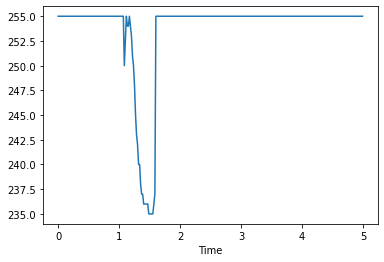

In [5]:
# Plot a variable over time
data['Acc'].plot()

<AxesSubplot:xlabel='Time'>

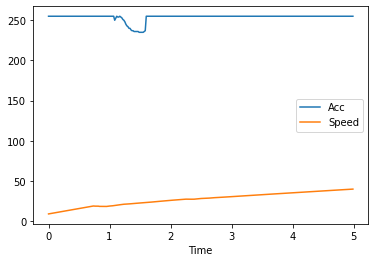

In [6]:
# Plot multiple variables over time
data[['Acc','Speed']].plot()

# Data Report

In [14]:
pickle.dump(data,open('data.pkl','wb'))
!jupyter nbconvert DataSheet.ipynb --to pdf --execute --no-input --output DataSheet.pdf

[NbConvertApp] Converting notebook DataSheet.ipynb to pdf
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Support files will be in DataSheet_files\
[NbConvertApp] Making directory .\DataSheet_files
[NbConvertApp] Making directory .\DataSheet_files
[NbConvertApp] Making directory .\DataSheet_files
[NbConvertApp] Making directory .\DataSheet_files
[NbConvertApp] Making directory .\DataSheet_files
[NbConvertApp] Writing 21455 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 94671 bytes to DataSheet.pdf
